In [1]:
from sklearn import datasets as ds 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

train_x , train_y = ds.load_svmlight_file('a9a.txt')
test_x , test_y = ds.load_svmlight_file('a9a.t')

x_train_array = train_x.toarray()
x_test_array = test_x.toarray()

zeros_column = np.zeros(len(x_test_array))
x_test_array = np.column_stack((x_test_array,zeros_column))

theta = np.zeros(123)
beta = 0
rate = 0.01
C = 0.1

In [2]:
def compute_function(x,t,b):
    return np.dot(t.T,x) + b

In [3]:
def compute_sum_theta( x_stochastic , y_stochastic , t , b ):
    sum = np.zeros(123)
    for x,y in zip( x_stochastic ,y_stochastic ):
        if 1 - y * compute_function(x , t , b ) >= 0 :
            sum = sum - y * x
    return sum / len(y_stochastic)

In [4]:
def compute_descent_theta( x , y ,t , b ):
    return theta + C * compute_sum_theta( x , y , t , b)

In [5]:
def compute_sum_beta( x_stochastic , y_stochastic , t , b):
    sum = 0
    for x,y in zip( x_stochastic ,y_stochastic ):
        if 1 - y * compute_function(x,t ,b) >= 0 :
            sum = sum - y
    return sum / len(y_stochastic)

In [6]:
def compute_descent_beta( x , y ,t ,b ):
    return C * compute_sum_beta( x , y ,t ,b)

In [7]:
def compute_loss(theta,beta):
    loss_part1 = 0
    loss_part2 = 0
    
    for i in range(len(theta)):
        loss_part1 = loss_part1 + theta[i] * theta[i]
    loss_part1 = loss_part1 / 2
    
    for x_term,y_term in zip(x_test_array,test_y):
        loss_part2 = loss_part2 + C * max( 0 , 1 - y_term * compute_function(x_term,theta,beta) )
    loss_part2 = loss_part2 / len(test_y)
    return loss_part1 + loss_part2

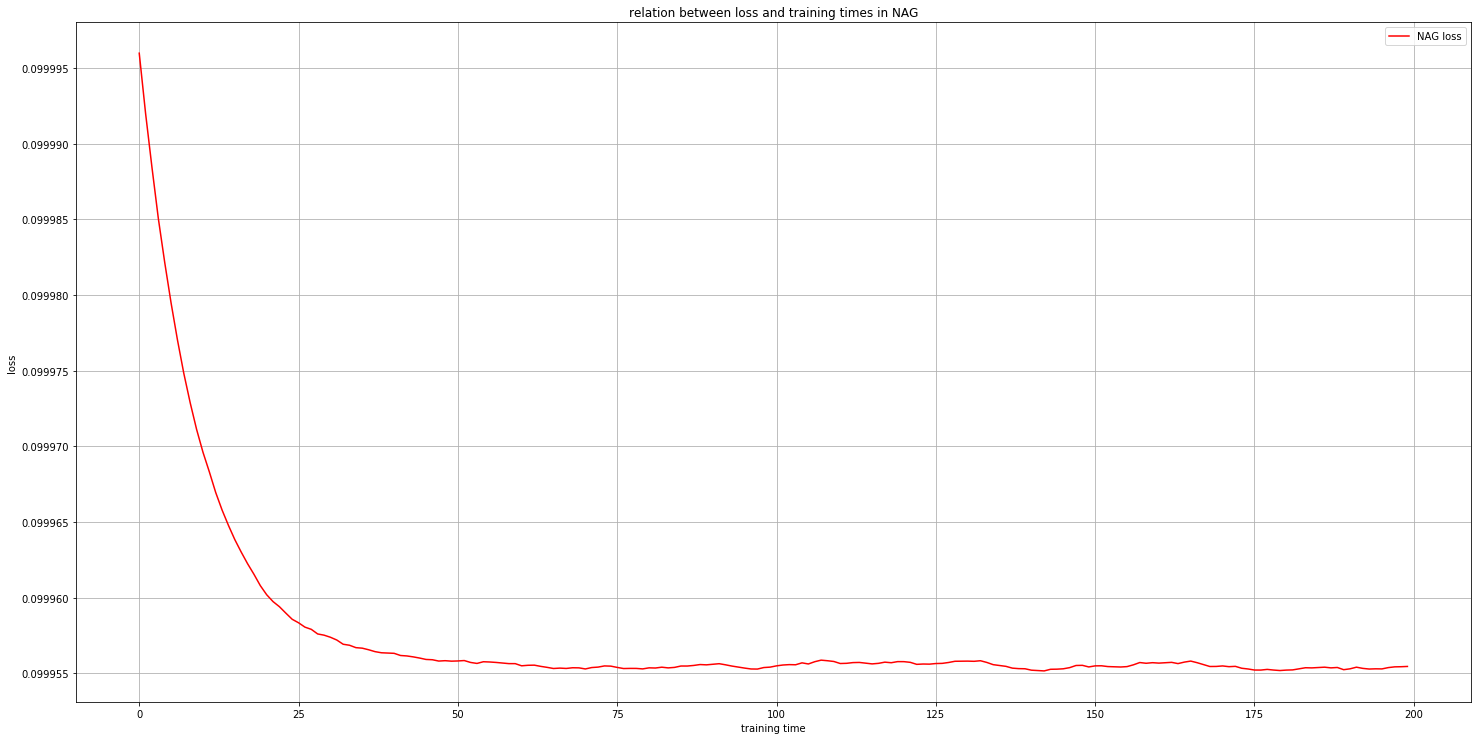

In [8]:
#NAG loss
theta = np.zeros(123)
beta = 0
v_theta = np.zeros(123)
v_beta = 0
rate = 0.0001
loss_NAG = []
for i in range(200):
    train_x_part1, train_x_part2,train_y_part1, train_y_part2 = train_test_split(x_train_array, train_y, test_size=0.2)
    theta_term = theta
    beta_term = beta
    descent_theta = compute_descent_theta(train_x_part2,train_y_part2,theta_term,beta_term)
    descent_beta = compute_descent_beta(train_x_part2,train_y_part2,theta_term,beta_term)
    v_theta = 0.9 * v_theta - rate * descent_theta
    v_beta = 0.9 * v_beta - rate * descent_beta 
    theta = theta - 0.9 * theta_term + ( 1 + 0.9 ) * v_theta
    beta = beta - 0.9 * beta_term + ( 1 + 0.9 ) * v_beta
    loss_NAG.append(compute_loss(theta,beta))

plt.figure(figsize=(25,12.5)) 
plt.plot(loss_NAG,label= "NAG loss",color = 'red')
plt.legend(loc='upper right')
plt.title('relation between loss and training times in NAG')
plt.xlabel('training time')
plt.ylabel('loss')
plt.grid()
plt.show()

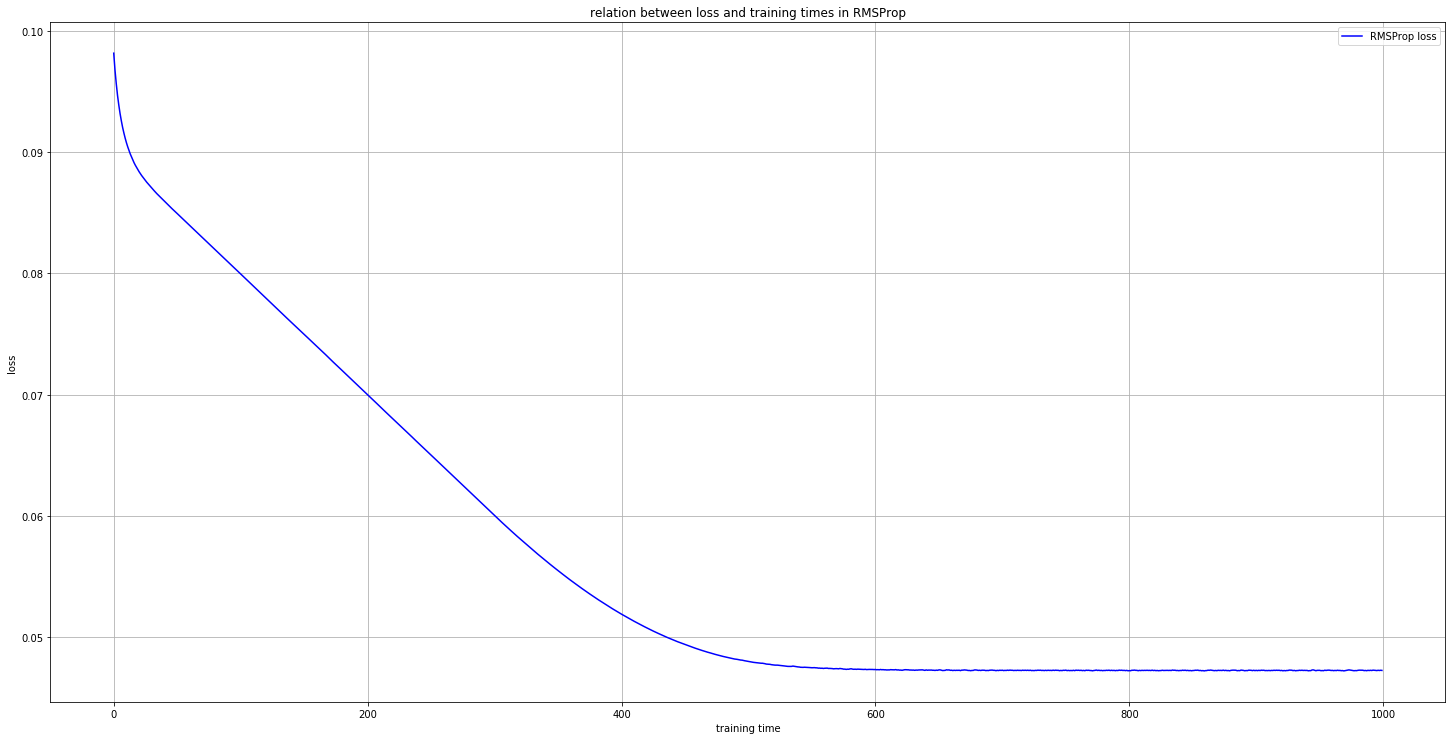

In [9]:
#RMSProp loss
theta = np.zeros(123)
beta = 0
G_theta = np.zeros(123)
G_beta = 0
loss_RMSProp = []
rate = 0.002

for i in range(1000):
    train_x_part1, train_x_part2,train_y_part1, train_y_part2 = train_test_split(x_train_array, train_y, test_size=0.2)
    theta_term = theta
    beta_term = beta
    descent_theta = compute_descent_theta(train_x_part2,train_y_part2,theta_term,beta_term)
    descent_beta = compute_descent_beta(train_x_part2,train_y_part2,theta_term,beta_term)
    G_theta = 0.9 * G_theta + 0.1 * descent_theta * descent_theta
    G_beta = 0.9 * G_beta + 0.1 * descent_beta * descent_beta
    theta = theta - (rate / np.power(G_theta + np.exp(-8) ,1/2)) * descent_theta
    beta = beta - (rate / np.power(G_beta + np.exp(-8) ,1/2)) * descent_beta
    loss_RMSProp.append(compute_loss(theta,beta))

plt.figure(figsize=(25,12.5)) 
plt.plot(loss_RMSProp,label= "RMSProp loss",color = 'blue')
plt.legend(loc='upper right')
plt.title('relation between loss and training times in RMSProp')
plt.xlabel('training time')
plt.ylabel('loss')
plt.grid()
plt.show()

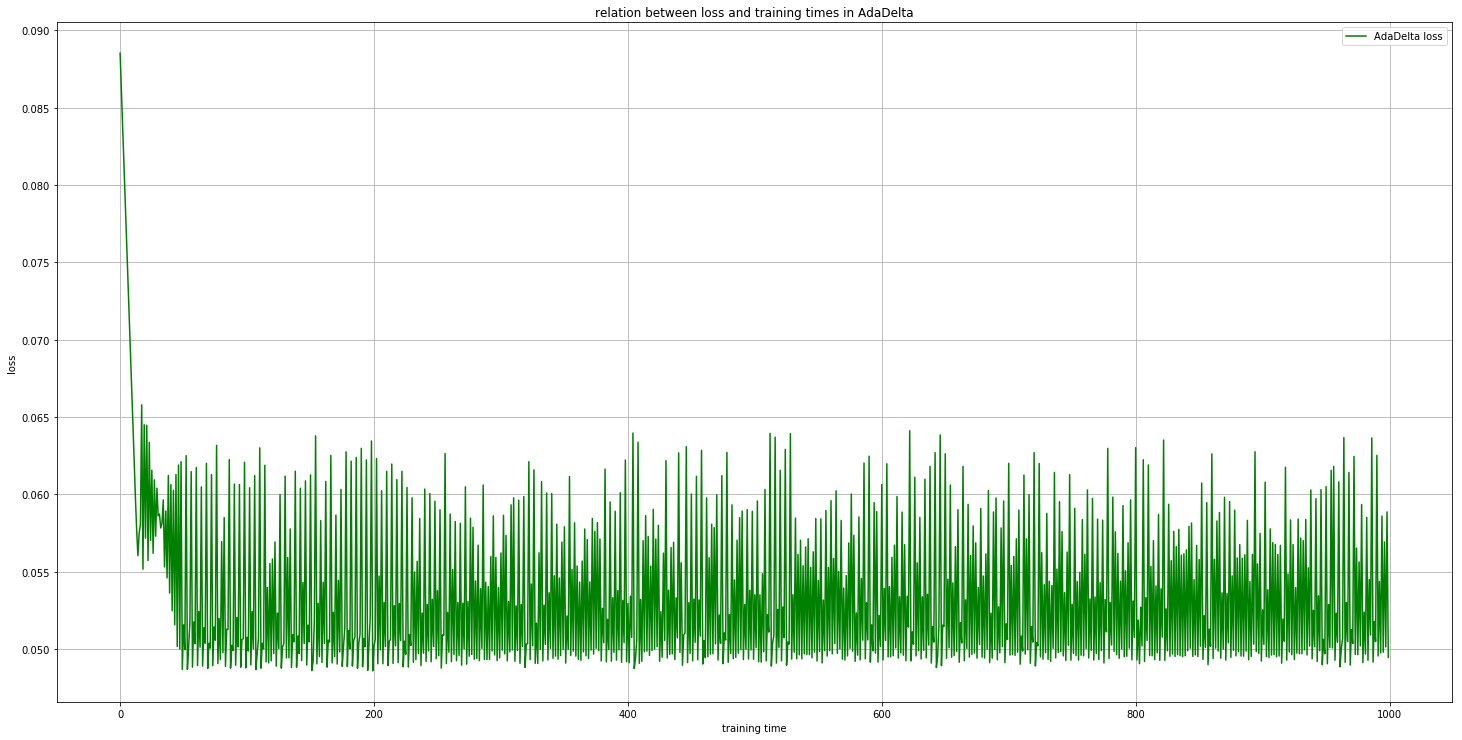

In [10]:
#AdaDelta loss
theta = np.zeros(123)
beta = 0
G_theta = np.zeros(123)
G_beta = 0
delta1_theta = np.zeros(123)
delta1_beta = 0
delta2_theta = np.zeros(123)
delta2_beta = 0
loss_AdaDelta = []
gama = 0.95

for i in range(1000):
    train_x_part1, train_x_part2,train_y_part1, train_y_part2 = train_test_split(x_train_array, train_y, test_size=0.05)
    theta_term = theta
    beta_term = beta
    descent_theta = compute_descent_theta(train_x_part2,train_y_part2,theta_term,beta_term)
    descent_beta = compute_descent_beta(train_x_part2,train_y_part2,theta_term,beta_term)
    G_theta = gama * G_theta + (1-gama) * descent_theta * descent_theta
    G_beta = gama * G_beta + (1-gama) * descent_beta * descent_beta
    delta1_theta = - (np.sqrt(delta2_theta + np.exp(-8) ) / np.sqrt(G_theta + np.exp(-8))) * descent_theta
    delta1_beta = - (np.sqrt(delta2_beta + np.exp(-8) ) / np.sqrt(G_beta + np.exp(-8))) * descent_beta
    theta = theta + delta1_theta
    beta = beta + delta1_beta
    delta2_theta = gama * delta2_theta + (1-gama) * delta1_theta * delta1_theta
    delta2_beta = gama * delta2_beta + (1-gama) * delta1_beta * delta1_beta
    loss_AdaDelta.append(compute_loss(theta,beta))

plt.figure(figsize=(25,12.5)) 
plt.plot(loss_AdaDelta,label= "AdaDelta loss",color = 'green')
plt.legend(loc='upper right')
plt.title('relation between loss and training times in AdaDelta')
plt.xlabel('training time')
plt.ylabel('loss')
plt.grid()
plt.show()

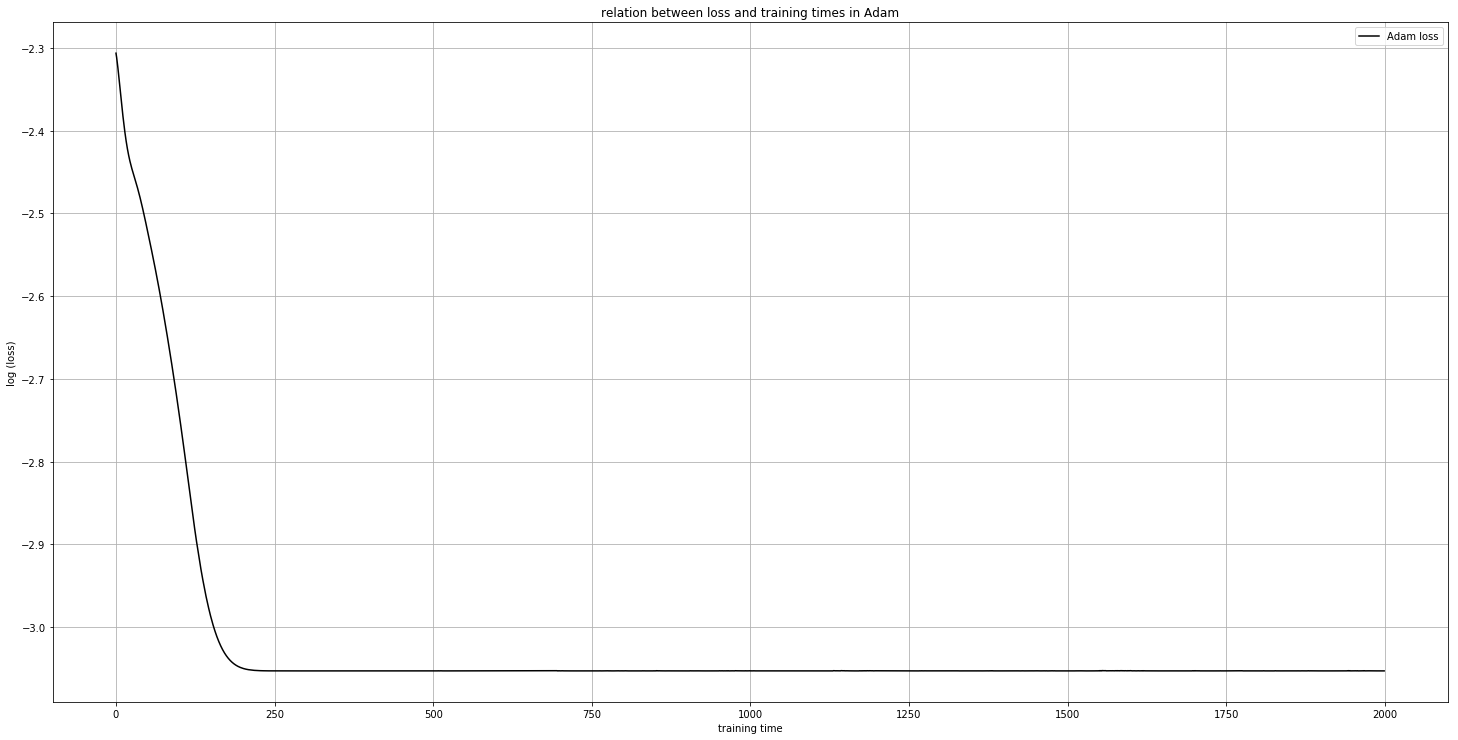

In [11]:
#Adam loss
theta = np.zeros(123)
beta = 0
G_theta = np.zeros(123)
G_beta = 0
m_theta = np.zeros(123)
m_beta = 0
loss_Adam = []
rate = 0.01

for i in range(2000):
    train_x_part1, train_x_part2,train_y_part1, train_y_part2 = train_test_split(x_train_array, train_y, test_size=0.2)
    theta_term = theta
    beta_term = beta
    descent_theta = compute_descent_theta(train_x_part2,train_y_part2,theta_term,beta_term)
    descent_beta = compute_descent_beta(train_x_part2,train_y_part2,theta_term,beta_term)
    m_theta = 0.9 * m_theta + 0.1 * descent_theta
    m_beta = 0.9 * m_beta + 0.1 * descent_beta
    G_theta = 0.999 * G_theta + 0.001 * descent_theta * descent_theta
    G_beta = 0.999 * G_beta + 0.001 * descent_beta * descent_beta
    alpha = rate * np.power(1 - np.power(0.999,i+1),1/2) / ( 1 - np.power(0.9,i+1))
    theta = theta - alpha * m_theta / np.power(G_theta + np.exp(-8),1/2)
    beta = beta - alpha * m_beta / np.power(G_beta + np.exp(-8),1/2)
    loss = compute_loss(theta,beta)
    loss_Adam.append(np.log(loss))
    
plt.figure(figsize=(25,12.5)) 
plt.plot(loss_Adam,label= "Adam loss",color = 'black')
plt.legend(loc='upper right')
plt.title('relation between loss and training times in Adam')
plt.xlabel('training time')
plt.ylabel('log (loss)')
plt.grid()
plt.show()